# Exercises
Arvin Lee (2301956134)

In [1]:
# Imports
from math import sqrt
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#   [getDistance] function
#   Get the distance between 2 points using pythagoras theorm.
def getDistance(point1: list, point2: list):
    return sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)


#   [getNewClusters] function
def getNewClusters(df: pd.DataFrame, clusterSize: int):
    newClusters = []
    for i in range(clusterSize):
        positions = df[df['closest to C[n]'] == i].iloc[:, 0:2].values
        positionSum = sum(positions)
        newClusters.append([positionSum[0] / len(positions), positionSum[1] / len(positions)])
    return newClusters


#   [kmeans] function
#   Calculates the centroids as well as grouping the points to the closest centorids.
def kmeans(points: list, clusters: list, limit=5):
    points = deepcopy(points)
    clusters = deepcopy(clusters)
    df = pd.DataFrame(points, columns = ['x', 'y'])

    print('=====Start=====')
    for i in range(5):
        j = 0
        while j < len(clusters):
            # Calculate the distance between every point toward every cluster
            df[f'dist from C[{j}]'] = [getDistance([point[0], point[1]], clusters[j]) for point in df.iloc[:, 0:2].values]
            j += 1
            
        closestToCn = [np.where(dist == np.amin(dist))[0][0] for dist in df.iloc[:, 2:2+len(clusters)].values]
        if ('closest to C[n]' in df and (df['closest to C[n]'] == closestToCn).all().item()): break # Break if points remain in the same cluster
        df['closest to C[n]'] = closestToCn

        print(f'=Itter {i}=\n{df}\n')
        newClusters: list = getNewClusters(df, len(clusters))
        if (clusters == newClusters): # Break if centroids have stabilize
            break
        clusters = newClusters
    print('=====End=====')
    return df, clusters

## Task 1

| Axis  | p1   | p2   | p3   | p4   | p5   | p6   | p7   | p8   |
| ----- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| **x** | 1    | 1    | 5    | 4    | 4    | 8    | 8    | 2    |
| **y** | 5    | 2    | 8    | 8    | 9    | 3    | 2    | 1    |

Given the data in the table, do the K-means clustering with k=3 and initial centroid:

1. C1 (1, 10)
2. C2 (5, 8)
3. C3 (9, 2)

In [3]:
points = [[1, 5], [1, 2], [5, 8], [4, 8], [4, 9], [8, 3], [8, 2], [2, 1]]
clusters = [[1, 10], [5, 8], [9, 2]]
df, clusters = kmeans(points, clusters)

=====Start=====
=Itter 0=
   x  y  dist from C[0]  dist from C[1]  dist from C[2]  closest to C[n]
0  1  5        5.000000        5.000000        8.544004                0
1  1  2        8.000000        7.211103        8.000000                1
2  5  8        4.472136        0.000000        7.211103                1
3  4  8        3.605551        1.000000        7.810250                1
4  4  9        3.162278        1.414214        8.602325                1
5  8  3        9.899495        5.830952        1.414214                2
6  8  2       10.630146        6.708204        1.000000                2
7  2  1        9.055385        7.615773        7.071068                2

=Itter 1=
   x  y  dist from C[0]  dist from C[1]  dist from C[2]  closest to C[n]
0  1  5        0.000000        3.051639        5.830952                0
1  1  2        3.000000        5.367728        5.000000                0
2  5  8        5.000000        1.952562        6.082763                1
3  4  8       

In [4]:
clusters

[[1.3333333333333333, 2.6666666666666665],
 [4.333333333333333, 8.333333333333334],
 [8.0, 2.5]]

In [5]:
df

,x,y,dist from C[0],dist from C[1],dist from C[2],closest to C[n]
0,1,5,2.357023,4.714045,7.433034,0
1,1,2,0.745356,7.156970,7.017834,0
2,5,8,6.472163,0.745356,6.264982,1
3,4,8,5.962848,0.471405,6.800735,1
4,4,9,6.871843,0.745356,7.632169,1
5,8,3,6.674995,6.472163,0.500000,2
6,8,2,6.699917,7.318166,0.500000,2
7,2,1,1.795055,7.695598,6.184658,0


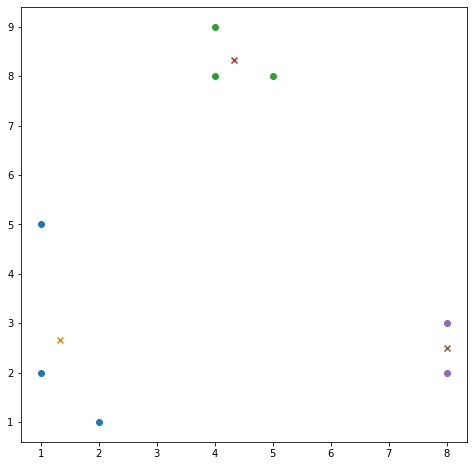

In [6]:
group1 = np.transpose(df[df['closest to C[n]'] == 0].iloc[:, :2].values)
cluster1 = clusters[0]
group2 = np.transpose(df[df['closest to C[n]'] == 1].iloc[:, :2].values)
cluster2 = clusters[1]
group3 = np.transpose(df[df['closest to C[n]'] == 2].iloc[:, :2].values)
cluster3 = clusters[2]

# Plotting
plt.figure(figsize=(8,8))

plt.scatter(group1[0], group1[1])
plt.scatter(cluster1[0], cluster1[1], marker='x')

plt.scatter(group2[0], group2[1])
plt.scatter(cluster2[0], cluster2[1], marker='x')

plt.scatter(group3[0], group3[1])
plt.scatter(cluster3[0], cluster3[1], marker='x')

## Task 2

| Axis     | p1   | p2   | p3   | p4   | p5   | p6   | p7   |
| -------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| **var1** | 1.0  | 1.5  | 3.0  | 5.0  | 3.5  | 4.5  | 3.5  |
| **var2** | 1.0  | 2.0  | 4.0  | 7.0  | 5.0  | 5.0  | 4.5  |

Given the data in the table, do the K-means clustering with k=2 and initial centroid:

| Initial centroid | var1 | var2 |
| ---------------- | ---- | ---- |
| c1               | 2.00 | 2.00 |
| c2               | 5.00 | 7.00 |

Plot the data in x and y axis, and make the circles to show your final clusters.

> Note: if you find the same distance between the point and the centroids, pick the first cluster.

In [7]:
points = [[1.0, 1.0], [1.5, 2.0], [3.0, 4.0], [5.0, 7.0], [3.5, 5.0], [4.5, 5.0], [3.5, 4.5]]
clusters = [[2.00, 5.00], [2.00, 7.00]]
df, clusters = kmeans(points, clusters)

=====Start=====
=Itter 0=
     x    y  dist from C[0]  dist from C[1]  closest to C[n]
0  1.0  1.0        4.123106        6.082763                0
1  1.5  2.0        3.041381        5.024938                0
2  3.0  4.0        1.414214        3.162278                0
3  5.0  7.0        3.605551        3.000000                1
4  3.5  5.0        1.500000        2.500000                0
5  4.5  5.0        2.500000        3.201562                0
6  3.5  4.5        1.581139        2.915476                0

=Itter 1=
     x    y  dist from C[0]  dist from C[1]  closest to C[n]
0  1.0  1.0        3.167763        7.211103                0
1  1.5  2.0        2.069957        6.103278                0
2  3.0  4.0        0.448764        3.605551                0
3  5.0  7.0        4.045745        0.000000                1
4  3.5  5.0        1.565691        2.500000                0
5  4.5  5.0        2.187401        2.061553                1
6  3.5  4.5        1.133456        2.915476     

In [8]:
clusters

[[1.25, 1.5], [3.9, 5.1]]

In [9]:
df

,x,y,dist from C[0],dist from C[1],closest to C[n]
0,1.0,1.0,1.572330,5.376453,0
1,1.5,2.0,0.471405,4.275658,0
2,3.0,4.0,2.034426,1.776584,1
3,5.0,7.0,5.639641,1.845603,1
4,3.5,5.0,3.144660,0.728869,1
5,4.5,5.0,3.771236,0.530330,1
6,3.5,4.5,2.733537,1.075291,1


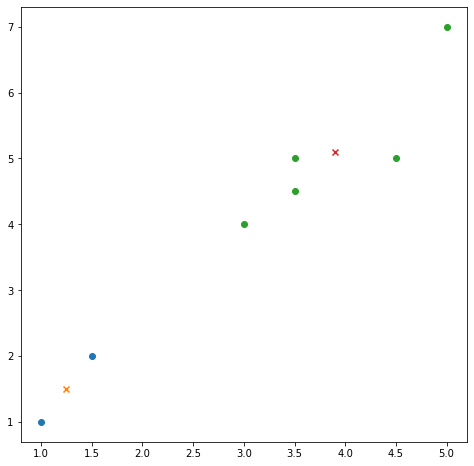

In [10]:
group1 = np.transpose(df[df['closest to C[n]'] == 0].iloc[:, :2].values)
cluster1 = clusters[0]
group2 = np.transpose(df[df['closest to C[n]'] == 1].iloc[:, :2].values)
cluster2 = clusters[1]

# Plotting
plt.figure(figsize=(8,8))

plt.scatter(group1[0], group1[1])
plt.scatter(cluster1[0], cluster1[1], marker='x')

plt.scatter(group2[0], group2[1])
plt.scatter(cluster2[0], cluster2[1], marker='x')

### Conclusion
The steps in kmeans are simple, there are mainly 3:
1. Define the number of cluster and initial clusters
2. Find distance between every cluster to every points
3. Calculate a new clusters and repeat from step 2 until either centroids have stabilize or points remain in the same cluster.